### Import Libraries

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


### Load the dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

### Create the model

In [3]:
input_img = Input(shape=(28, 28, 1)) 

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

### Train the model

In [4]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 53s 891us/step - loss: 0.2110 - val_loss: 0.1425
Epoch 2/50
60000/60000 [==============================] - 52s 873us/step - loss: 0.1313 - val_loss: 0.1227
Epoch 3/50
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1196 - val_loss: 0.1152
Epoch 4/50
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1138 - val_loss: 0.1103
Epoch 5/50
60000/60000 [==============================] - 59s 984us/step - loss: 0.1103 - val_loss: 0.1076
Epoch 6/50
60000/60000 [==============================] - 47s 780us/step - loss: 0.1079 - val_loss: 0.1056
Epoch 7/50
60000/60000 [==============================] - 46s 774us/step - loss: 0.1061 - val_loss: 0.1041
Epoch 8/50
60000/60000 [==============================] - 47s 775us/step - loss: 0.1046 - val_loss: 0.1027
Epoch 9/50
60000/60000 [==============================] - 46s 774us/step - loss: 0.1034 - val_loss

### Plot the losses

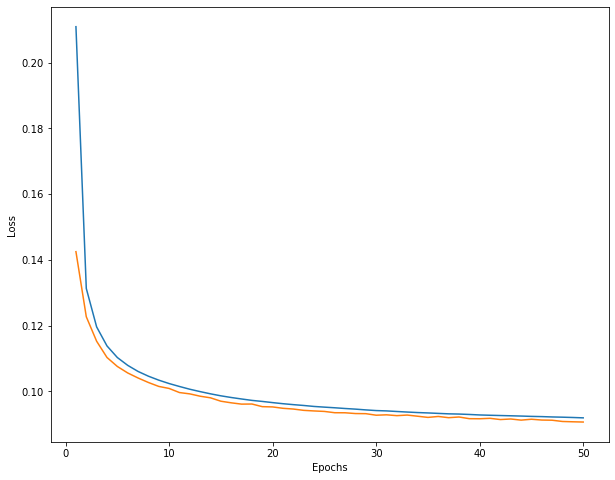

In [5]:
epochs = 50
plt.figure(figsize=(10, 8))
plt.plot(np.arange(1, epochs + 1), autoencoder.history.history['loss'])
plt.plot(np.arange(1, epochs + 1), autoencoder.history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Plot original and reconstructed image

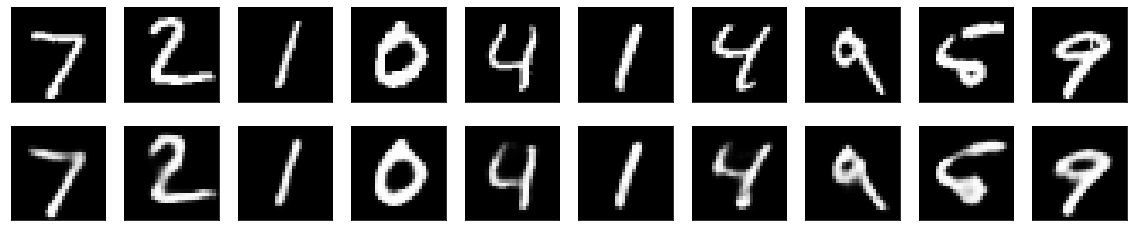

In [7]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Plot the encoded image

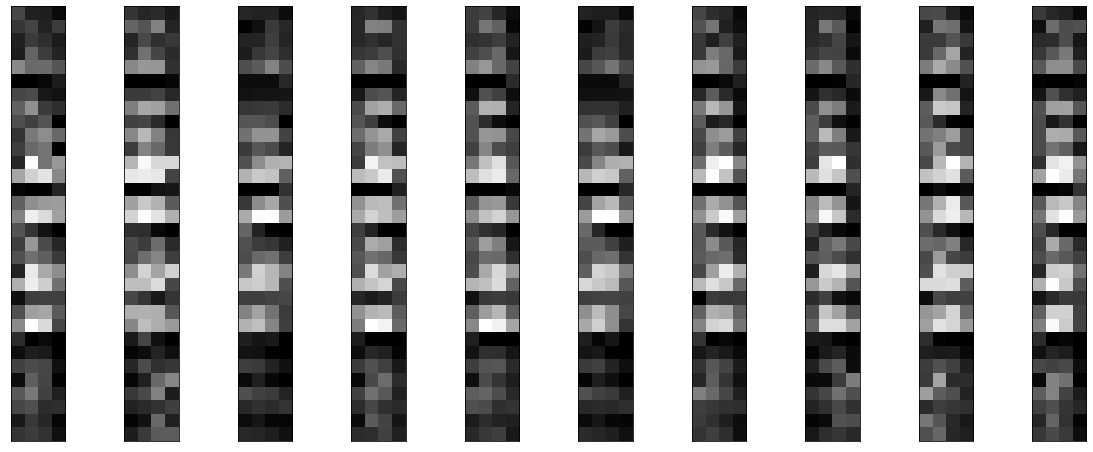

In [11]:
encoder_model = Model(inputs=autoencoder.inputs, outputs=autoencoder.layers[6].output)
encoded_imgs = encoder_model.predict(x_test) 


n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()